In [18]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
from IPython.display import display
from pprint import pprint

import pickle
from graph.graph_info import GraphManager, InfoManager


def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)


def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)


g: GraphManager = GraphManager()
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g = g_serialized
g.inf.shape


inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
# inf = inf[(inf.level_no != 0)]  
df = inf[~inf['similarity_with_l0th_parent_teket'].isnull()]
inf.shape, inf.columns


((24326, 47),
 Index(['paper_id', 'uuid', 'parent_paper_uuid', 'parent_paper_id', 'title',
        'level_no', 'multiple_appearances_in_levels_count',
        'multiple_appearances_in_levels', 'path_from_root', 'reference_count',
        'citation_count', 'influential_citation_count', 'published_date',
        'paper_type', 'venue', 'isOpenAccess', 'abstract', 'paper_link', 'doi',
        'download_link', 'tldl', 'embedding', 'age',
        'citation_count_min_max_norm', 'age_min_max_norm', 'influence_score',
        'similarity_with_l0th_parent_teket',
        'similarity_with_l1th_parent_teket',
        'similarity_with_l2th_parent_teket',
        'similarity_with_level_0_parent_em',
        'similarity_with_level_1_parent_em',
        'similarity_with_level_2_parent_em',
        'similarity_with_immediate_parent_em', 'in_deg_centrality',
        'out_deg_centrality', 'degree_centrality', 'closeness_centrality',
        'betweenness_centrality', 'eigenvector_centrality', 'load_centra

In [17]:
# inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape

(24326, 47)

In [15]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
inf['in_deg_centrality_norm'] = norm.fit_transform(
    inf['in_deg_centrality'].values.reshape(-1, 1))
inf['out_deg_centrality_norm'] = norm.fit_transform(
    inf['out_deg_centrality'].values.reshape(-1, 1))
inf['degree_centrality_norm'] = norm.fit_transform(
    inf['degree_centrality'].values.reshape(-1, 1))
inf['closeness_centrality_norm'] = norm.fit_transform(
    inf['closeness_centrality'].values.reshape(-1, 1))
inf['betweenness_centrality_norm'] = norm.fit_transform(
    inf['betweenness_centrality'].values.reshape(-1, 1))
inf['eigenvector_centrality_norm'] = norm.fit_transform(
    inf['eigenvector_centrality'].values.reshape(-1, 1))
inf['load_centrality_norm'] = norm.fit_transform(
    inf['load_centrality'].values.reshape(-1, 1))


In [16]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

In [140]:
# [{i:v} for i,v in enumerate(inf.columns)]

In [141]:
# inf.insert(25, 'influence_score', inf.pop('influence_score'))


In [194]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

## Stats

### Data Usage

In [10]:
kp = pd.read_csv(
    "data\info\kp_raw_clean_without_stem\key_phrases_extracted.csv", usecols=['paper_id'])
already_extracted = kp.paper_id.unique().tolist()
already_extracted_len = len(already_extracted)
already_extracted_len


6822

In [11]:
unused = 66
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf")]
Pdfs_downloaded = len(pdf_files_id_list) + unused
Pdfs_downloaded


7637

In [12]:
paper_covers_by_extracted_key_phrases = inf[inf['paper_id'].isin(already_extracted)]
paper_covers_by_extracted_key_phrases_len = paper_covers_by_extracted_key_phrases.shape[0]
total_papers_duplicates_as_unique = inf.shape[0]
total_unique_papers = inf['paper_id'].nunique()
print(f"Total Papers considering each duplicates as unique:{total_papers_duplicates_as_unique} papers")
print(f"Total Unique Papers: {total_unique_papers}",)
print(f"Total Papers downloaded[pdf]: {Pdfs_downloaded}",)
print(f"Successfully KeyPhrases Extracted Papers: {already_extracted_len}")
print(f"Considering duplicates, KeyPhrases Extracted Papers covers: {paper_covers_by_extracted_key_phrases_len }, {paper_covers_by_extracted_key_phrases_len/total_papers_duplicates_as_unique*100:.2f}% of total papers")


Total Papers considering each duplicates as unique:24326 papers
Total Unique Papers: 9269
Total Papers downloaded[pdf]: 7637
Successfully KeyPhrases Extracted Papers: 6822
Considering duplicates, KeyPhrases Extracted Papers covers: 17315, 71.18% of total papers


In [13]:
inf.level_no.value_counts().sort_index()


0        1
1       39
2     1037
3    23249
Name: level_no, dtype: int64

In [39]:
inf.groupby('level_no').size()


level_no
0        1
1       39
2     1037
3    23249
dtype: int64

(24387, 42)

In [14]:
for i, level_iTh_papers_ids in enumerate(g.levelOrderList):
	if i ==4:
		break
	print(f"{('*'*5)} level {i}  {('*'*5)}")
	print(f"total papers: {len(level_iTh_papers_ids)}")
	downloaded_papers = []
	converted = []
	keyPhraseExtracted = []

	for paper in level_iTh_papers_ids:
		paper_id = paper['paper_id']
		# if paper_id in pdf_files_id_list:
		# 	downloaded_papers.append(paper)
		if paper_id in already_extracted:
			keyPhraseExtracted.append(paper)
	print(f"key-phrase extracted:{len(keyPhraseExtracted)}")
	print(
		f"key-phrase extraction percentage in {i} level: {round(len(keyPhraseExtracted)/len(level_iTh_papers_ids),2)}%")


***** level 0  *****
total papers: 1
key-phrase extracted:1
key-phrase extraction percentage in 0 level: 1.0%
***** level 1  *****
total papers: 39
key-phrase extracted:37
key-phrase extraction percentage in 1 level: 0.95%
***** level 2  *****
total papers: 1037
key-phrase extracted:810
key-phrase extraction percentage in 2 level: 0.78%
***** level 3  *****
total papers: 23249
key-phrase extracted:16467
key-phrase extraction percentage in 3 level: 0.71%


### Paper Appearance 

In [57]:
uinf = inf[inf.duplicated(subset=['paper_id'],keep='first')]

In [78]:
lvls = g.get_levels_no_by_paper_id(
    levelsOrderList=g.levelOrderList, id="12355df323e6a82030fa6c98e97b512121367ece")

print(len(lvls), lvls)

lvls = g.get_levels_no_by_paper_id(
    levelsOrderList=g.levelOrderList, id="591394cfab5879934a59f6c44f03b6c4009042f0")

print(len(lvls),lvls)
# 03589e1917debe6df148cac8963fd008e4140237, 1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd


1 [1]
185 [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [22]:
g.levelOrderList[0]


[{'uuid': '8bde6cb8-296d-4593-883f-b768103e1e69',
  'parent_paper_uuid': nan,
  'paper_id': 'b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  'parent_paper_id': nan}]

In [26]:
g.im.get_info_keys_by_uuid("8bde6cb8-296d-4593-883f-b768103e1e69", ["paper_id", "title",])

{'paper_id': 'b0d555a9ea67285fccd2ef8d887907bcc811f67a',
 'title': 'PositionRank: An Unsupervised Approach to Keyphrase Extraction from Scholarly Documents'}

In [53]:
# level_1_papers = [x['paper_id'] for x in g.levelOrderList[1]]
# level_1_papers_data = []
unq_papers = inf.paper_id.unique().tolist()
papers_data = []
for i in unq_papers:
     levels = g.get_levels_no_by_paper_id(levelsOrderList=g.levelOrderList, id=i)
     appearances_count = len(levels)
     levels_str = ",".join([str(p) for p in levels])
     papers_data.append({
          "paper_id": i,
          "multiple_appearances_in_levels_count": appearances_count,
          "multiple_appearances_in_levels": levels_str
     })

In [54]:
papers_appearances_count = pd.DataFrame(papers_data)
print(papers_appearances_count.shape)
papers_appearances_count.head()


(9276, 3)


,paper_id,multiple_appearances_in_levels_count,multiple_appearances_in_levels
0,b0d555a9ea67285fccd2ef8d887907bcc811f67a,1,0
1,03589e1917debe6df148cac8963fd008e4140237,41,"1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,..."
2,05dec9ff0f48f45b09245ba0354748961f18ff77,1,1
3,12355df323e6a82030fa6c98e97b512121367ece,1,1
4,1736c33defcf1dda6742e4d577b7e0ce9b63e4fc,10,"1,2,2,2,2,3,3,3,3,3"


In [19]:
# inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
# inf.shape

(24387, 42)

In [84]:
info_new = papers_appearances_count.merge(inf, on='paper_id', how='right')
# level_1_papers_df[level_1_papers_df.duplicated(subset=['paper_id'],keep='first')].shape
# papers.shape

# print(info_new.shape)
# info_new.head()


In [45]:
# info_new.to_csv('data/info/info_full_ss_new_x_2.csv', index=False)

In [74]:
# [{i: v} for i, v in enumerate(info_new.columns.tolist())]


In [75]:
# info_new.insert(7, 'multiple_appearances_in_levels',
#                 info_new.pop('multiple_appearances_in_levels'))


In [240]:
unq_info = inf.drop_duplicates(subset=['paper_id'], keep='first')
unq_info.shape

(9269, 42)

In [254]:
X_Mixed = pd.read_csv("data/info/inf_mixed.csv")
unq_info = X_Mixed.drop_duplicates(subset=['paper_id'], keep='first')
unq_info.shape
# X_Mixed.shape

(6271, 29)

In [256]:
papers = papers_appearances_count.merge(
    unq_info, on='paper_id', how='left')
# level_1_papers_df[level_1_papers_df.duplicated(subset=['paper_id'],keep='first')].shape
papers.shape


(9269, 31)

### Duplicate Data

In [3]:
duplicateRowsCount = inf[inf.duplicated(['paper_id'])].groupby(
    "paper_id").size().sort_values(ascending=False)

print(duplicateRowsCount.shape[0])
dup_df = inf[inf['paper_id'].isin(duplicateRowsCount.index)].drop_duplicates(
    subset=['paper_id'])
dup_df['dup_count'] = np.nan
dup_df.shape

3031


(3031, 43)

In [4]:
duplicateRowsCount

paper_id
591394cfab5879934a59f6c44f03b6c4009042f0    184
10d6778bc45aebcd58d336b4062b935861d2fe8a    160
9a12ac1e3b51f30042abdadc5636c88d41bf0ca7    160
771ca13f78a6cfda9ed99004a386e9e7e187bd34    144
7b95d389bc6affe6a127d53b04bcfd68138f1a1a    135
                                           ... 
923db0aeb26a6dc1cb42069c9db04e5dd2d2200a      1
9221ab4b7c890434cb5cc3d56d0a582dac52ea70      1
24b20f7b118588055346f4ac5cdb1fe22e886dda      1
24c0da4bf293ffd6adc0babad37de445977c8267      1
0025b963134b1c0b64c1389af19610d038ab7072      1
Length: 3031, dtype: int64

In [5]:
duplicateRowsCountDic = duplicateRowsCount.to_dict()

In [7]:
for index, row in dup_df.iterrows():
	dup_count = row["dup_count"]
	dup_df.at[index, "dup_count"] = duplicateRowsCountDic[row["paper_id"]]


In [8]:
dup_df.sort_values(by=['dup_count'], ascending=False).head(3)


,uuid,paper_id,parent_id,parent_paper_uuid,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l2_em,similarity_with_immediate_parent_em,influence_score,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality,citation_count_standard_norm,age_standard_norm,dup_count
18,40439042-e2b0-44af-aeb9-68c8d1473264,591394cfab5879934a59f6c44f03b6c4009042f0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Learning Algorithms for Keyphrase Extraction,78,875,63,2000.0,Article,...,NaN,0.744783,0.553604,0.006361,0.004528,9.164623e-07,0.000360,-0.087249,-0.392929,184.0
217,523c2ffa-2b77-4937-9bba-ceab3cdd3e20,10d6778bc45aebcd58d336b4062b935861d2fe8a,6f813e6b-d731-4cbc-b721-17c05bdcd8e3,26092619b8be8f0048172bb52bc07b36129b579e,The Anatomy of a Large-Scale Hypertextual Web ...,18,15689,1798,1998.0,Article,...,NaN,0.512808,0.511631,0.008194,0.001509,8.611481e-02,0.000088,1.363748,-0.219984,160.0
53,39d59b01-2268-43a2-8283-4c3daa1d6ca1,9a12ac1e3b51f30042abdadc5636c88d41bf0ca7,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,KEA: practical automatic keyphrase extraction,29,1005,130,1999.0,Conference Paper,...,NaN,0.769029,0.541297,0.007224,0.001617,9.165261e-07,0.000186,-0.074516,-0.306456,160.0


In [34]:
dup_df.columns


Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_uuid', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'influence_score', 'in_deg_centrality', 'out_deg_centrality',
       'eigenvector_centrality', 'load_centrality',
       'citation_count_standard_norm', 'age_standard_norm', 'dup_count'],
      dtype='object')

<AxesSubplot:xlabel='dup_count', ylabel='in_deg_centrality'>

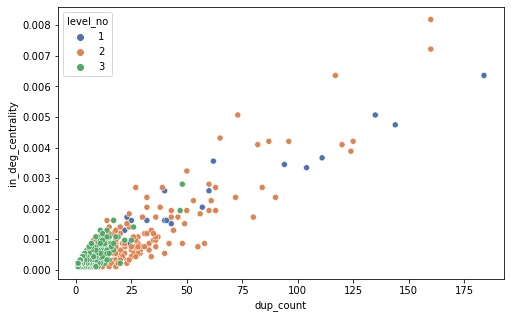

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='in_deg_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='out_deg_centrality'>

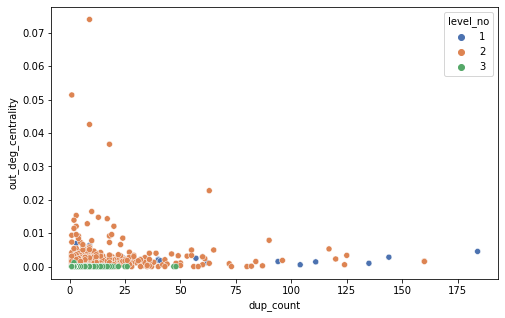

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='dup_count', y='out_deg_centrality',
                data=dup_df, hue='level_no', palette="deep")


<AxesSubplot:xlabel='dup_count', ylabel='degree_centrality'>

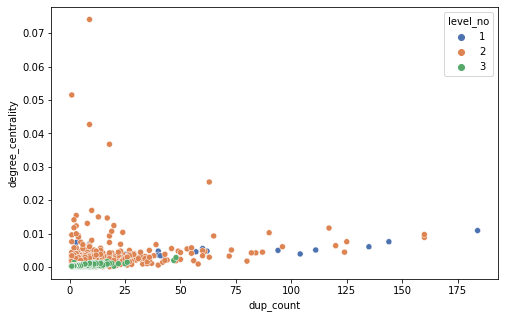

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='degree_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='closeness_centrality'>

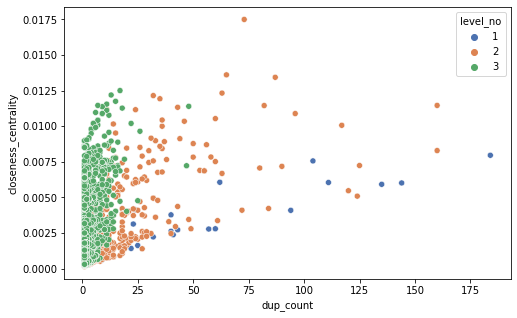

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='closeness_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='betweenness_centrality'>

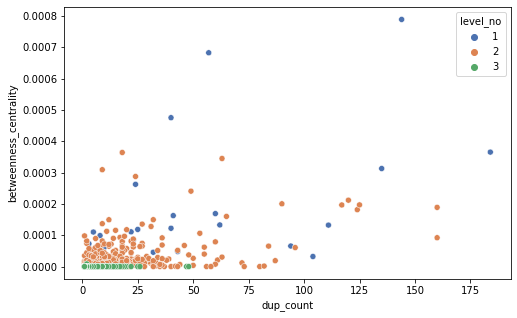

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='betweenness_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='eigenvector_centrality'>

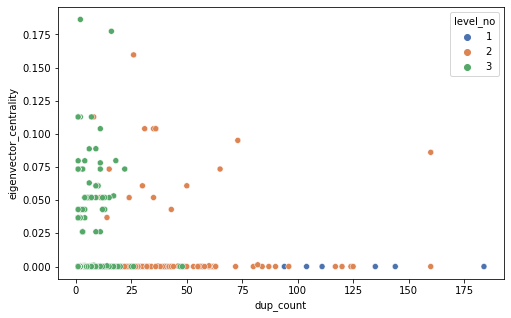

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='eigenvector_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='load_centrality'>

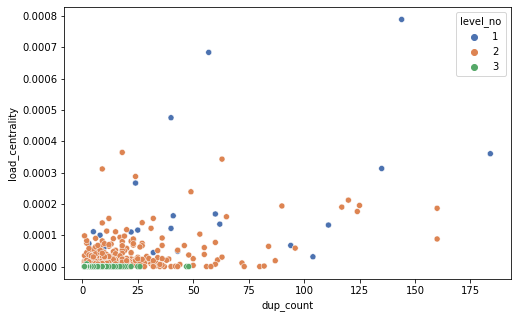

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='load_centrality', data=dup_df,hue='level_no',palette="deep")

In [12]:
cols = ['dup_count', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality']
g = sns.PairGrid(dup_df, hue='level_no', vars=cols)

# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
plt.savefig("plots/dup_count_vs_centrality.png",format='png', dpi=1200)
plt.savefig("plots/dup_count_vs_centrality.svg",format='svg', dpi=1200)

### Summary

#### Xraw

In [20]:
inf = df[df.level_no != 0]
inf.shape


(17314, 47)

In [21]:
inf_num = inf.select_dtypes(include=['number'])
inf_num.fillna(0, inplace=True)
inf_num.shape,inf_num.columns


((17314, 31),
 Index(['level_no', 'multiple_appearances_in_levels_count', 'reference_count',
        'citation_count', 'influential_citation_count', 'published_date', 'age',
        'citation_count_min_max_norm', 'age_min_max_norm', 'influence_score',
        'similarity_with_l0th_parent_teket',
        'similarity_with_l1th_parent_teket',
        'similarity_with_l2th_parent_teket',
        'similarity_with_level_0_parent_em',
        'similarity_with_level_1_parent_em',
        'similarity_with_level_2_parent_em',
        'similarity_with_immediate_parent_em', 'in_deg_centrality',
        'out_deg_centrality', 'degree_centrality', 'closeness_centrality',
        'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
        'in_deg_centrality_norm', 'out_deg_centrality_norm',
        'degree_centrality_norm', 'closeness_centrality_norm',
        'betweenness_centrality_norm', 'eigenvector_centrality_norm',
        'load_centrality_norm'],
       dtype='object'))

In [27]:
all_cols = ['similarity_with_l0th_parent_teket',
            'similarity_with_l1th_parent_teket',
            'similarity_with_l2th_parent_teket', 'influence_score',
'degree_centrality','closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']

In [95]:
inf_num['paper_id'] = inf['paper_id'].values
inf_num['uuid'] = inf['uuid'].values


In [96]:
inf_num.to_csv('data/info/inf_num_raw.csv', index=False)

<AxesSubplot:>

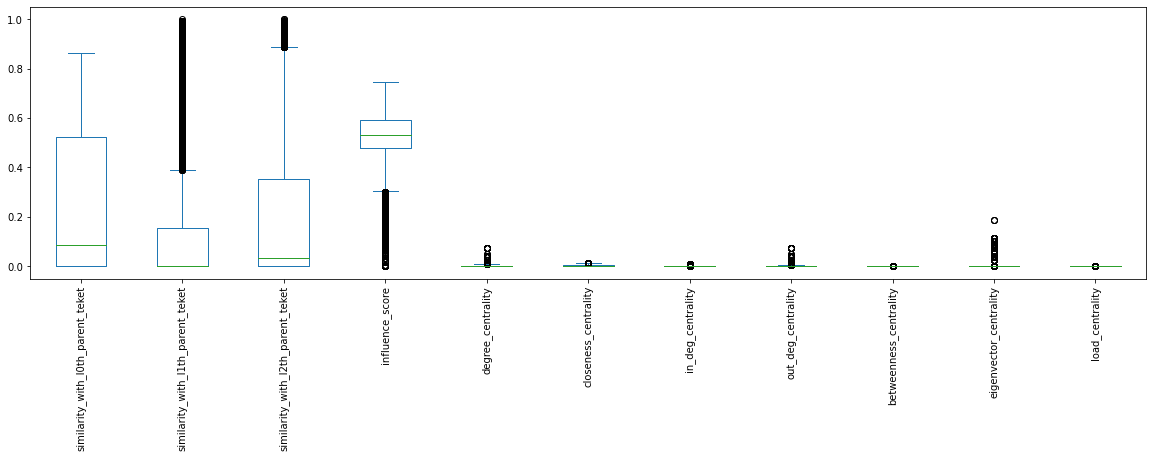

In [28]:

inf_num[all_cols].plot.box(figsize=(20,5), rot=90)

KeyError: "['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2', 'similarity_with_immediate_parent'] not in index"

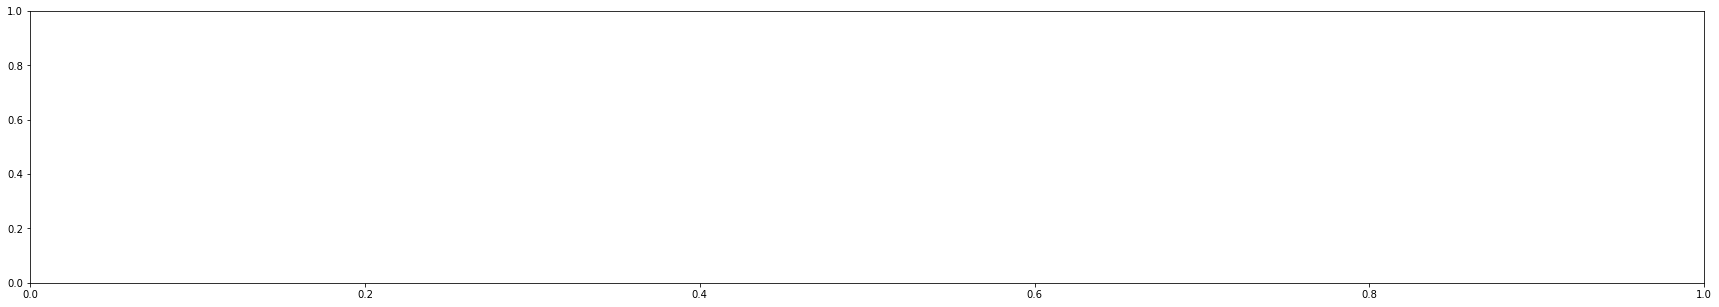

In [26]:
fig, ax = plt.subplots(figsize=(30,5))
sns.boxplot(data=inf_num[all_cols], palette="winter")
# set background color to white
# ax.set_facecolor('white')
# fig.set_facecolor('white')
# plt.savefig("plots/1_boxplot_raw_all.png",format='png',transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_raw_all.svg",format='svg',transparent=False, dpi=500)

<AxesSubplot:>

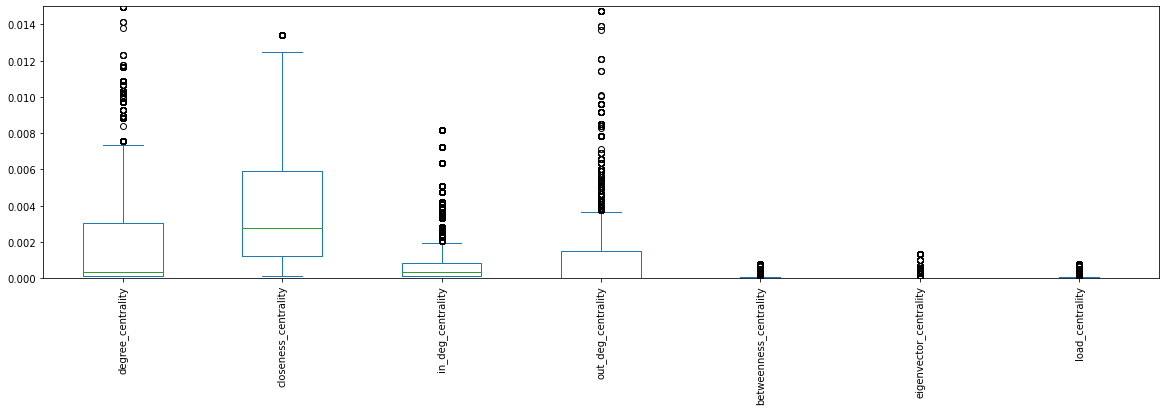

In [101]:
centrality_cols = ['degree_centrality', 'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']
inf_num[centrality_cols].plot.box(figsize=(20,5), rot=90,ylim=(0,0.015))

<AxesSubplot:>

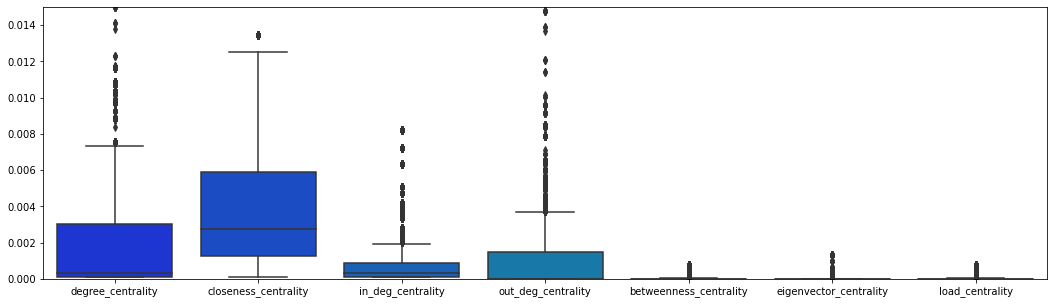

In [102]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.set_ylim(0,0.015)
sns.boxplot(data=inf_num[centrality_cols], palette="winter")
# set background color to white
# ax.set_facecolor('white')
# fig.set_facecolor('white')
# plt.savefig("plots/1_boxplot_raw_centrality_all.png",format='png',transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_raw_centrality_all.svg",
#             format='svg', transparent=False, dpi=500)


<AxesSubplot:>

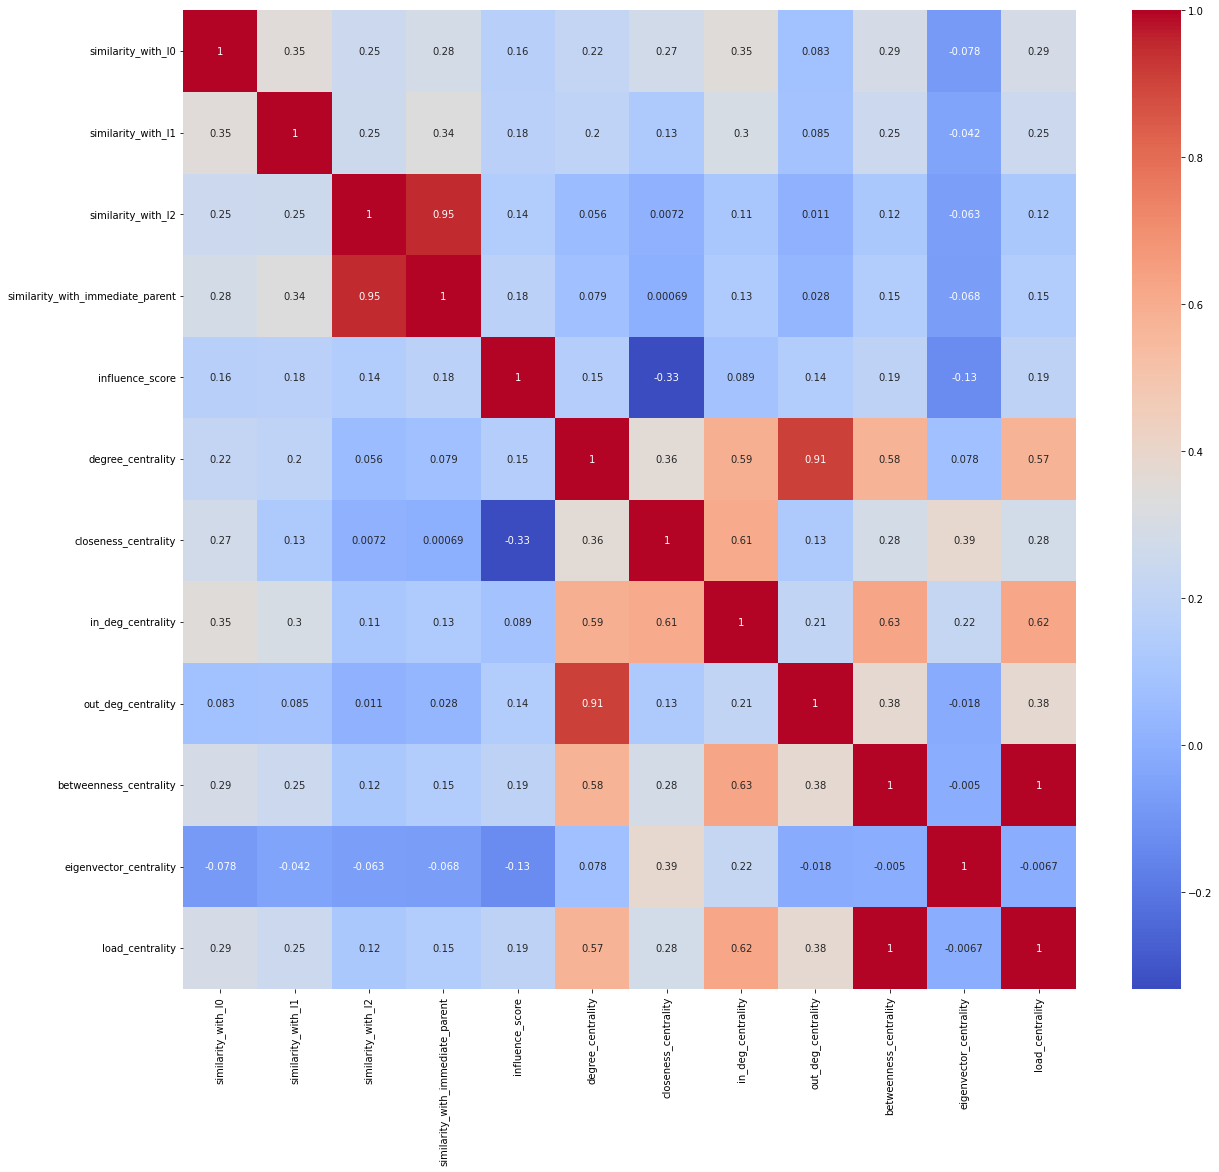

In [22]:
plt.figure(figsize=(20, 18))
sns.heatmap(inf_num[all_cols].corr(), annot=True, cmap='coolwarm')
# plt.savefig("plots/1_all_correlation.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/1_all_correlation.svg",
#             format='svg', transparent=False, dpi=500)


In [23]:
corr_matrix = inf_num[all_cols].corr()


In [25]:
feature = 'similarity_with_l0'
corr_matrix[feature][corr_matrix[feature] > 0.3]


similarity_with_l0    1.000000
similarity_with_l1    0.351065
in_deg_centrality     0.348971
Name: similarity_with_l0, dtype: float64

In [26]:
feature = 'degree_centrality'
corr_matrix[feature][corr_matrix[feature] > 0.3]


degree_centrality         1.000000
closeness_centrality      0.363823
in_deg_centrality         0.592749
out_deg_centrality        0.909968
betweenness_centrality    0.576301
load_centrality           0.573892
Name: degree_centrality, dtype: float64

#### Xnorm

<AxesSubplot:>

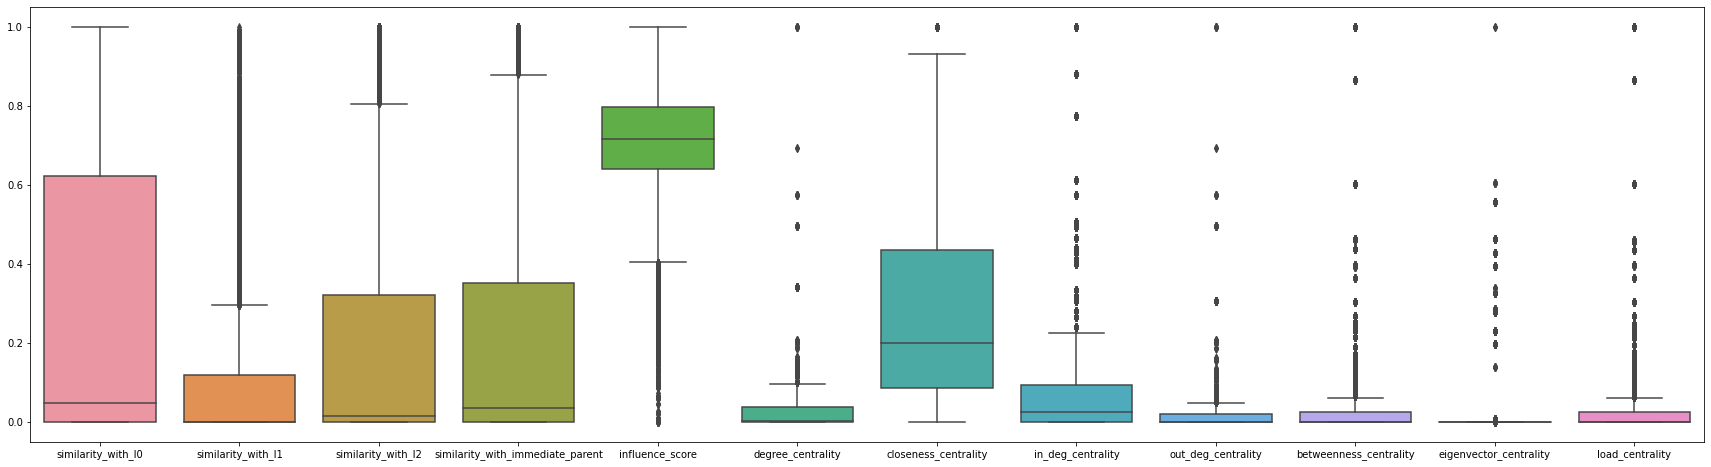

In [103]:
# from sklearn.preprocessing import MinMaxScaler
# norm = MinMaxScaler()
# X_norm = norm.fit_transform(inf_num[all_cols])

# X_norm = pd.DataFrame(X_norm, columns=inf_num[all_cols].columns)
sns.set_palette("winter")
fig, ax = plt.subplots(figsize=(30, 8))
# ax.set_ylim(-5,5)
sns.boxplot(data=X_norm)
# X_scaled.plot.box(figsize=(20,5), rot=90)
# plt.savefig("plots/1_boxplot_normalized_all.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_normalized_all.svg",
#             format='svg', transparent=False, dpi=500)


In [104]:
X_norm.shape

(17278, 12)

In [105]:
X_norm['level_no'] = inf_num['level_no'].values


In [106]:
X_norm['level_no'].unique()

array([1, 2, 3], dtype=int64)

In [107]:
X_norm['paper_id'] = inf['paper_id'].values
X_norm['uuid'] = inf['uuid'].values


In [108]:
X_norm.shape

(17278, 15)

In [109]:
X_norm.to_csv("data/info/inf_num_normalized.csv", index=False)

#### X_scaled

<AxesSubplot:>

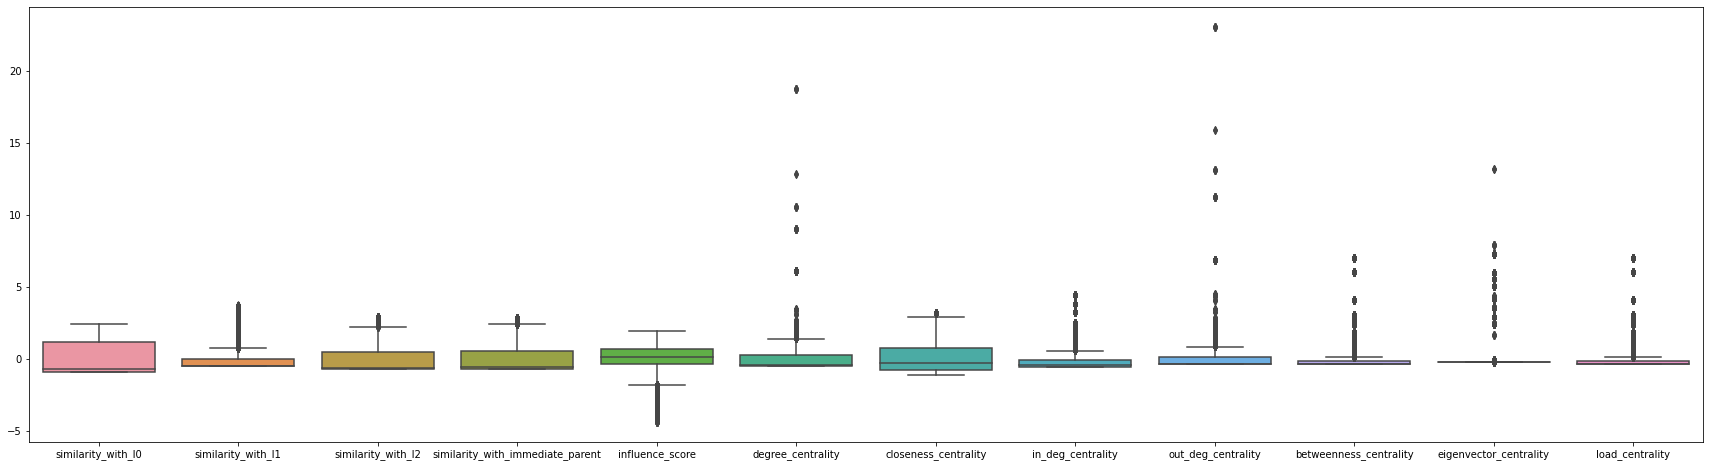

In [110]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(inf_num[all_cols])

X_scaled = pd.DataFrame(X_scaled, columns=inf_num[all_cols].columns)
sns.set_palette("winter")
fig,ax = plt.subplots(figsize=(30, 8))
# ax.set_ylim(-5,5)
sns.boxplot(data=X_scaled)
# X_scaled.plot.box(figsize=(20,5), rot=90)
# plt.savefig("plots/1_boxplot_standardized_all.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_standardized_all.svg",
#             format='svg', transparent=False, dpi=500)

In [111]:
X_scaled['level_no'] = inf['level_no'].values

In [112]:
X_scaled['level_no'].unique()


array([1, 2, 3], dtype=int64)

In [113]:
X_scaled['paper_id'] = inf['paper_id'].values
X_scaled['uuid'] = inf['uuid'].values


In [114]:
X_scaled.to_csv("data/info/inf_num_standardized.csv", index=False)


## Level Wise Similarity